In [73]:
!pip install imblearn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


In [74]:
#import neccessary libraries
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from collections import Counter
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from imblearn.combine import SMOTETomek
import os
from sklearn import metrics
from scipy.stats import zscore
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

#NSL-KDD

In [75]:
nsl_train_full = "KDDTrain+.txt"
nsl_test_full = "KDDTest+.txt"
df_train_nsl = pd.read_csv(nsl_train_full, header=None)
df_test_nsl = pd.read_csv(nsl_test_full, header=None)

In [76]:
df_train_nsl.drop(df_train_nsl.columns[42], axis=1, inplace= True)
df_test_nsl.drop(df_test_nsl.columns[42], axis=1, inplace= True)

In [77]:
#merge the 2 datasets
frames = [df_train_nsl, df_test_nsl]
  
nsl_df = pd.concat(frames)

In [78]:
#original data columns are unlabeled, we are labeling them
nsl_df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

In [79]:
nsl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  

In [80]:
#print some insights about the KDD99 dataset
print("Read {} rows.".format(len(nsl_df)))
print('='*40)
print('The number of data points are:', nsl_df.shape[0])
print('='*40)
print('The number of features are:', nsl_df.shape[1])
print('='*40)
output = nsl_df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))
print('='*40)
print('='*40)

Read 148517 rows.
The number of data points are: 148517
The number of features are: 42
The different type of output labels are: {'ipsweep', 'warezclient', 'snmpguess', 'portsweep', 'sqlattack', 'saint', 'spy', 'teardrop', 'imap', 'udpstorm', 'warezmaster', 'back', 'apache2', 'processtable', 'loadmodule', 'ps', 'worm', 'land', 'phf', 'ftp_write', 'mailbomb', 'mscan', 'normal', 'buffer_overflow', 'satan', 'xterm', 'httptunnel', 'smurf', 'pod', 'multihop', 'rootkit', 'named', 'guess_passwd', 'neptune', 'snmpgetattack', 'sendmail', 'xsnoop', 'xlock', 'nmap', 'perl'}
The number of different output labels are: 40


In [81]:
# Checking for NULL values
print('Null values in dataset are',len(nsl_df[nsl_df.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
nsl_df.drop_duplicates(keep='first', inplace = True)

# For now, just drop NA's (rows with missing values)
nsl_df.dropna(inplace=True,axis=1) 

print("Read {} rows.".format(len(nsl_df)))
print('='*40)
print('='*40)

Null values in dataset are 0
Read 147907 rows.


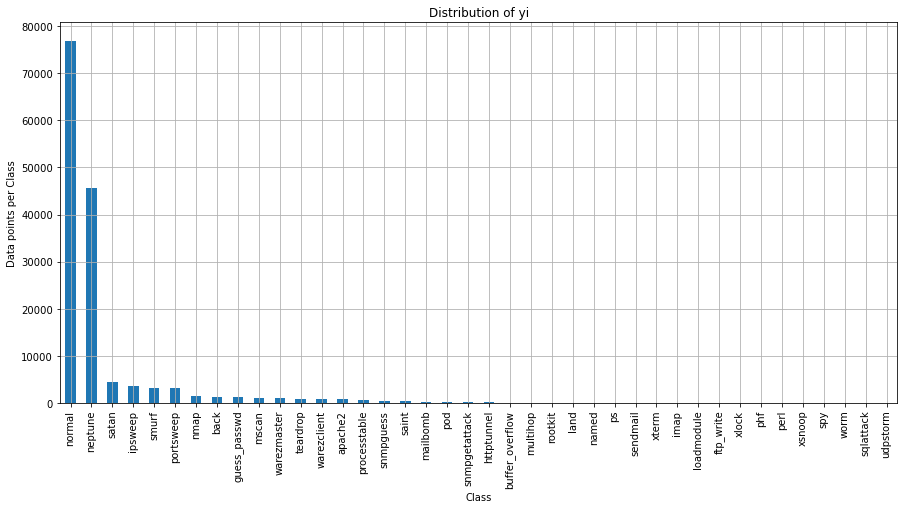

In [82]:
plt.figure(figsize=(15,7))
class_distribution = nsl_df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi')
plt.grid()
plt.show()

In [83]:
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/nsl_df.shape[0]*100), 3), '%)')

Number of data points in class normal : 76967 ( 52.037 %)
Number of data points in class neptune : 45716 ( 30.909 %)
Number of data points in class satan : 4360 ( 2.948 %)
Number of data points in class ipsweep : 3643 ( 2.463 %)
Number of data points in class smurf : 3108 ( 2.101 %)
Number of data points in class portsweep : 3070 ( 2.076 %)
Number of data points in class nmap : 1566 ( 1.059 %)
Number of data points in class back : 1300 ( 0.879 %)
Number of data points in class guess_passwd : 1284 ( 0.868 %)
Number of data points in class mscan : 996 ( 0.673 %)
Number of data points in class warezmaster : 964 ( 0.652 %)
Number of data points in class teardrop : 901 ( 0.609 %)
Number of data points in class warezclient : 890 ( 0.602 %)
Number of data points in class apache2 : 737 ( 0.498 %)
Number of data points in class processtable : 685 ( 0.463 %)
Number of data points in class snmpguess : 331 ( 0.224 %)
Number of data points in class saint : 319 ( 0.216 %)
Number of data points in cl

#Some preprocessing

In [84]:
nsl_df['outcome'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

##Apply onehot encoding to the categorical columns

In [85]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [86]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [87]:
# Now encode the feature vector

encode_numeric_zscore(nsl_df, 'duration')
encode_text_dummy(nsl_df, 'protocol_type')
encode_text_dummy(nsl_df, 'service')
encode_text_dummy(nsl_df, 'flag')
encode_numeric_zscore(nsl_df, 'src_bytes')
encode_numeric_zscore(nsl_df, 'dst_bytes')
encode_text_dummy(nsl_df, 'land')
encode_numeric_zscore(nsl_df, 'wrong_fragment')
encode_numeric_zscore(nsl_df, 'urgent')
encode_numeric_zscore(nsl_df, 'hot')
encode_numeric_zscore(nsl_df, 'num_failed_logins')
encode_text_dummy(nsl_df, 'logged_in')
encode_numeric_zscore(nsl_df, 'num_compromised')
encode_numeric_zscore(nsl_df, 'root_shell')
encode_numeric_zscore(nsl_df, 'su_attempted')
encode_numeric_zscore(nsl_df, 'num_root')
encode_numeric_zscore(nsl_df, 'num_file_creations')
encode_numeric_zscore(nsl_df, 'num_shells')
encode_numeric_zscore(nsl_df, 'num_access_files')
encode_numeric_zscore(nsl_df, 'num_outbound_cmds')
encode_text_dummy(nsl_df, 'is_host_login')
encode_text_dummy(nsl_df, 'is_guest_login')
encode_numeric_zscore(nsl_df, 'count')
encode_numeric_zscore(nsl_df, 'srv_count')
encode_numeric_zscore(nsl_df, 'serror_rate')
encode_numeric_zscore(nsl_df, 'srv_serror_rate')
encode_numeric_zscore(nsl_df, 'rerror_rate')
encode_numeric_zscore(nsl_df, 'srv_rerror_rate')
encode_numeric_zscore(nsl_df, 'same_srv_rate')
encode_numeric_zscore(nsl_df, 'diff_srv_rate')
encode_numeric_zscore(nsl_df, 'srv_diff_host_rate')
encode_numeric_zscore(nsl_df, 'dst_host_count')
encode_numeric_zscore(nsl_df, 'dst_host_srv_count')
encode_numeric_zscore(nsl_df, 'dst_host_same_srv_rate')
encode_numeric_zscore(nsl_df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(nsl_df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(nsl_df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(nsl_df, 'dst_host_serror_rate')
encode_numeric_zscore(nsl_df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(nsl_df, 'dst_host_rerror_rate')
encode_numeric_zscore(nsl_df, 'dst_host_srv_rerror_rate')

# display 5 rows

nsl_df.dropna(inplace=True,axis=1)
nsl_df[0:5]
# This is the numeric feature vectorF

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_host_login-1,is_guest_login-0,is_guest_login-1
0,-0.112715,-0.007360,-0.004623,-0.085118,-0.010424,-0.094169,-0.059955,-0.011492,-0.038946,-0.02308,...,1,0,1,0,1,0,1,0,1,0
1,-0.112715,-0.007423,-0.004623,-0.085118,-0.010424,-0.094169,-0.059955,-0.011492,-0.038946,-0.02308,...,1,0,1,0,1,0,1,0,1,0
2,-0.112715,-0.007450,-0.004623,-0.085118,-0.010424,-0.094169,-0.059955,-0.011492,-0.038946,-0.02308,...,0,0,1,0,1,0,1,0,1,0
3,-0.112715,-0.007408,-0.002427,-0.085118,-0.010424,-0.094169,-0.059955,-0.011492,-0.038946,-0.02308,...,1,0,1,0,0,1,1,0,1,0
4,-0.112715,-0.007414,-0.004510,-0.085118,-0.010424,-0.094169,-0.059955,-0.011492,-0.038946,-0.02308,...,1,0,1,0,0,1,1,0,1,0


#SMOTE

In [88]:
x = nsl_df.drop(['outcome'], axis=1)
y = nsl_df['outcome']

In [89]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
sm = SMOTE(sampling_strategy= 'not majority',k_neighbors= 1)
X_sm, y_sm = sm.fit_resample(x, y)
counter = Counter(y_sm)
print('After',counter)

Before Counter({'normal': 76967, 'neptune': 45716, 'satan': 4360, 'ipsweep': 3643, 'smurf': 3108, 'portsweep': 3070, 'nmap': 1566, 'back': 1300, 'guess_passwd': 1284, 'mscan': 996, 'warezmaster': 964, 'teardrop': 901, 'warezclient': 890, 'apache2': 737, 'processtable': 685, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'pod': 221, 'snmpgetattack': 178, 'httptunnel': 133, 'buffer_overflow': 50, 'multihop': 25, 'rootkit': 23, 'land': 22, 'named': 17, 'ps': 15, 'sendmail': 14, 'xterm': 13, 'imap': 12, 'ftp_write': 11, 'loadmodule': 11, 'xlock': 9, 'phf': 6, 'perl': 5, 'xsnoop': 4, 'spy': 2, 'worm': 2, 'sqlattack': 2, 'udpstorm': 2})
After Counter({'normal': 76967, 'neptune': 76967, 'warezclient': 76967, 'ipsweep': 76967, 'portsweep': 76967, 'teardrop': 76967, 'nmap': 76967, 'satan': 76967, 'smurf': 76967, 'pod': 76967, 'back': 76967, 'guess_passwd': 76967, 'ftp_write': 76967, 'multihop': 76967, 'rootkit': 76967, 'buffer_overflow': 76967, 'imap': 76967, 'warezmaster': 76967, 'phf': 7696

##RF + similarity optimization

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dtree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[("std_slc", std_slc),("pca", pca),("dtree", dtree)])
n_components = list(range(1,X_sm.shape[1]+1,1))
criterion = ["friedman_mse", "mse"]
max_depth = [4,6,8,10]
parameters = dict(pca__n_components=n_components,dtree__criterion=criterion,dtree__max_depth=max_depth)
          
clf = GridSearchCV(pipe, parameters)
clf.fit(X_sm, y_sm)

print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(); print(clf.best_estimator_.get_params()["dtreeReg"])

CV_Result = cross_val_score(clf, X_sm, y_sm, cv=3, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

#split the dataset

In [90]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=100)

X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm, y_sm, train_size=0.7, random_state=100)

#Train models on the unnormalized dataset

In [33]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)
print(y_pred_knn)

['normal' 'normal' 'normal' ... 'normal' 'neptune' 'guess_passwd']


/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


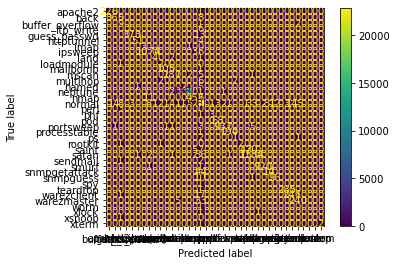

In [34]:
#confusion_matrix(y_test, y_pred_knn)
from sklearn.metrics import plot_confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_pred_knn)
plot_confusion_matrix(neigh, X_test, y_test)
plt.show()

In [35]:
print(classification_report(y_test, y_pred_knn))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00       227
           back       0.96      0.98      0.97       373
buffer_overflow       0.36      0.75      0.49        12
      ftp_write       0.00      0.00      0.00         6
   guess_passwd       0.99      0.97      0.98       386
     httptunnel       0.96      0.93      0.94        55
           imap       1.00      0.75      0.86         4
        ipsweep       0.98      0.99      0.99      1083
           land       0.80      0.57      0.67         7
     loadmodule       0.29      0.67      0.40         3
       mailbomb       0.97      0.99      0.98       106
          mscan       0.97      0.97      0.97       296
       multihop       0.00      0.00      0.00        10
          named       0.67      0.25      0.36         8
        neptune       1.00      1.00      1.00     13852
           nmap       0.97      0.96      0.97       474
         normal       0.99    

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [37]:
y_pred_svm = svm_clf.predict(X_test)
y_pred_svm

array(['normal', 'normal', 'normal', ..., 'normal', 'neptune',
       'guess_passwd'], dtype=object)

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


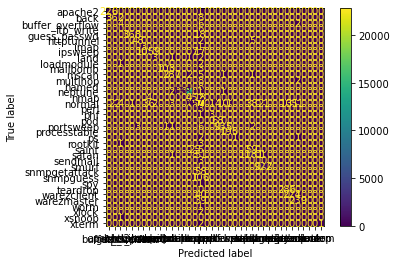

In [38]:
cnf_matrix=confusion_matrix(y_test,y_pred_svm)
plot_confusion_matrix(svm_clf, X_test, y_test)
plt.show()

In [39]:
print(classification_report(y_test, y_pred_svm))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        apache2       0.99      1.00      0.99       227
           back       0.94      0.97      0.96       373
buffer_overflow       0.36      0.33      0.35        12
      ftp_write       0.00      0.00      0.00         6
   guess_passwd       1.00      0.95      0.97       386
     httptunnel       0.94      0.87      0.91        55
           imap       1.00      0.75      0.86         4
        ipsweep       0.96      0.98      0.97      1083
           land       0.60      0.43      0.50         7
     loadmodule       0.00      0.00      0.00         3
       mailbomb       0.99      0.97      0.98       106
          mscan       0.97      0.97      0.97       296
       multihop       0.00      0.00      0.00        10
          named       0.00      0.00      0.00         8
        neptune       1.00      1.00      1.00     13852
           nmap       0.91      0.95      0.93       474
         normal       0.98    

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [41]:
y_pred_rf = rf_clf.predict(X_test)

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


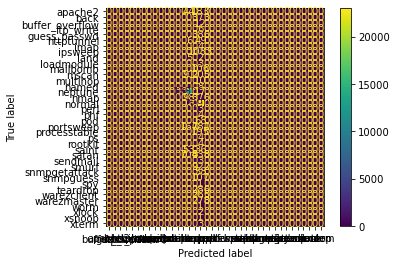

In [42]:
cnf_matrix=confusion_matrix(y_test,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test, y_test)
plt.show()

In [43]:
print(classification_report(y_test, y_pred_rf))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       227
           back       0.00      0.00      0.00       373
buffer_overflow       0.00      0.00      0.00        12
      ftp_write       0.00      0.00      0.00         6
   guess_passwd       0.00      0.00      0.00       386
     httptunnel       0.00      0.00      0.00        55
           imap       0.00      0.00      0.00         4
        ipsweep       0.00      0.00      0.00      1083
           land       0.00      0.00      0.00         7
     loadmodule       0.00      0.00      0.00         3
       mailbomb       0.00      0.00      0.00       106
          mscan       0.00      0.00      0.00       296
       multihop       0.00      0.00      0.00        10
          named       0.00      0.00      0.00         8
        neptune       0.92      1.00      0.96     13852
           nmap       0.00      0.00      0.00       474
         normal       0.78    

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Train models on normalized dataset with SMOTE

In [44]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_sm, y_train_sm)
y_pred_knn = neigh.predict(X_test_sm)
print(y_pred_knn)

['teardrop' 'loadmodule' 'sqlattack' ... 'mscan' 'ps' 'apache2']


/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


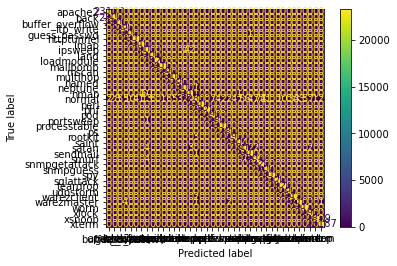

In [47]:
#confusion_matrix(y_test, y_pred_knn)
cnf_matrix=confusion_matrix(y_test_sm,y_pred_knn)
plot_confusion_matrix(neigh, X_test_sm, y_test_sm)
plt.show()

In [48]:
print(classification_report(y_test_sm, y_pred_knn))

                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00     23103
           back       1.00      1.00      1.00     23051
buffer_overflow       1.00      1.00      1.00     23065
      ftp_write       1.00      1.00      1.00     22968
   guess_passwd       1.00      1.00      1.00     23005
     httptunnel       1.00      1.00      1.00     23172
           imap       1.00      1.00      1.00     23172
        ipsweep       1.00      1.00      1.00     23076
           land       1.00      1.00      1.00     23046
     loadmodule       1.00      1.00      1.00     23253
       mailbomb       1.00      1.00      1.00     23187
          mscan       1.00      1.00      1.00     22901
       multihop       1.00      1.00      1.00     23041
          named       1.00      1.00      1.00     22973
        neptune       1.00      1.00      1.00     23050
           nmap       1.00      1.00      1.00     23176
         normal       1.00    

In [68]:
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=3, random_state=0)

In [69]:
y_pred_rf = rf_clf.predict(X_test_sm)

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


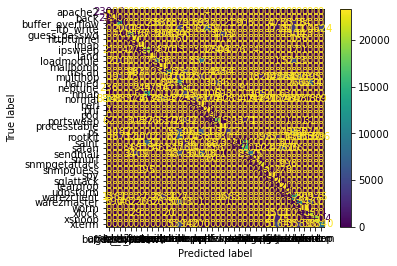

In [70]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test_sm, y_test_sm)
plt.show()

In [71]:
print(classification_report(y_test_sm, y_pred_rf))

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        apache2       0.71      1.00      0.83     23103
           back       0.92      1.00      0.96     23051
buffer_overflow       0.65      0.59      0.62     23065
      ftp_write       0.97      0.09      0.16     22968
   guess_passwd       0.99      0.62      0.77     23005
     httptunnel       0.77      0.98      0.86     23172
           imap       0.95      1.00      0.97     23172
        ipsweep       0.46      0.86      0.60     23076
           land       0.96      1.00      0.98     23046
     loadmodule       0.76      0.33      0.46     23253
       mailbomb       0.70      1.00      0.83     23187
          mscan       0.86      0.59      0.70     22901
       multihop       1.00      0.06      0.11     23041
          named       0.21      0.41      0.27     22973
        neptune       0.62      0.95      0.75     23050
           nmap       1.00      0.00      0.00     23176
         normal       1.00    

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SMOTE + ENN

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
X_temp = pd.concat([X_train_sm, X_test_sm], axis=0)
y_temp = pd.concat([y_train_sm, y_test_sm], axis=0)
X_train_temp,X_test_temp,y_train_temp,y_test_temp=train_test_split(X_temp, y_temp, train_size=0.98, random_state=100)

smm = SMOTE(sampling_strategy= 'not majority',k_neighbors= 1)
smenn = SMOTEENN(sampling_strategy= 'not majority', smote = smm)
X_smenn, y_smenn = smenn.fit_resample(X_train_temp, y_train_temp)
counter = Counter(y_smenn)
print('After',counter)

X_x = pd.concat([X_smenn, X_test_temp], axis=0)
y_y = pd.concat([y_smenn, y_test_temp], axis=0)
X_train_smenn,X_test_smenn,y_train_smenn,y_test_smenn=train_test_split(X_x, y_y, train_size=0.7, random_state=100)

Before Counter({'normal': 53980, 'neptune': 31864, 'satan': 3118, 'ipsweep': 2560, 'smurf': 2186, 'portsweep': 2122, 'nmap': 1092, 'back': 927, 'guess_passwd': 898, 'mscan': 700, 'warezmaster': 686, 'warezclient': 625, 'teardrop': 615, 'apache2': 510, 'processtable': 490, 'saint': 230, 'snmpguess': 224, 'mailbomb': 187, 'pod': 153, 'snmpgetattack': 120, 'httptunnel': 78, 'buffer_overflow': 38, 'rootkit': 19, 'land': 15, 'multihop': 15, 'ps': 11, 'sendmail': 11, 'xterm': 10, 'named': 9, 'loadmodule': 8, 'imap': 8, 'xlock': 7, 'ftp_write': 5, 'xsnoop': 3, 'udpstorm': 2, 'perl': 2, 'sqlattack': 2, 'phf': 2, 'worm': 1, 'spy': 1})


#models after normalization using: SMOTE + ENN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_smenn, y_train_smenn)
y_pred_knn = neigh.predict(X_test_sm)
print(y_pred_knn)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_knn)
plot_confusion_matrix(neigh, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_knn))

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train_smenn, y_train_smenn)

In [ ]:
y_pred_svm = svm_clf.predict(X_test_sm)
y_pred_svm

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_svm)
plot_confusion_matrix(svm_clf, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_svm))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train_smenn, y_train_smenn)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_sm)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_rf))

#SMOTE+Tomek links

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
X_temp = pd.concat([X_train_sm, X_test_sm], axis=0)
y_temp = pd.concat([y_train_sm, y_test_sm], axis=0)
X_train_temp,X_test_temp,y_train_temp,y_test_temp=train_test_split(X_temp, y_temp, train_size=0.98, random_state=100)

smtom = SMOTETomek(random_state=139)
X_smtom, y_smtom = smtom.fit_resample(X_train_temp, y_train_temp)

counter = Counter(y_smtom)
print('After',counter)


X_x = pd.concat([X_smtom, X_test_temp], axis=0)
y_y = pd.concat([y_smtom, y_test_temp], axis=0)
X_train_smtom,X_test_smtom,y_train_smtom,y_test_smtom=train_test_split(X_x, y_y, train_size=0.7, random_state=100)

#models after normalization using: SMOTE + Tomek links

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_smtom, y_train_smtom)
y_pred_knn = neigh.predict(X_test_sm)
print(y_pred_knn)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_knn)
plot_confusion_matrix(neigh, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_knn))

In [ ]:
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train_smtom, y_train_smtom)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_sm)

In [ ]:
cnf_matrix=confusion_matrix(y_test_sm,y_pred_rf)
plot_confusion_matrix(rf_clf, X_test_sm, y_test_sm)
plt.show()

In [ ]:
print(classification_report(y_test_sm, y_pred_rf))